In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head()
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [24]:
print(pd.unique(fish['Species'])) #어떤 종류 생선 있는지 고유값 확인

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [25]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #넘파이 변환

In [26]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [27]:
fish_target = fish['Species'].to_numpy()

In [28]:
from sklearn.model_selection import train_test_split

#train, test 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)



In [31]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#도미, 빙어 행만 골라내기 / 도미와 빙어일 경우 True이고 그 이외는 모두 False 

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [33]:
print(lr.predict(train_bream_smelt[:5])) #처음 5개 샘플만 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [34]:
print(lr.predict_proba(train_bream_smelt[:5])) #예측 확률 출력

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [35]:
print(lr.classes_) # 도미와 빙어중 어떤것이 양성클래스인지 확인

['Bream' 'Smelt']


In [36]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [37]:
print(lr.predict(test_scaled[:5])) #테스트 세트의 샘플 예측 출력

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [38]:
proba = lr.predict_proba(test_scaled[:5]) #테스트 세트의 샘플 5개의 예측 확률 출력

print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [39]:
decision = lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [40]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [20]:
from sklearn.linear_model import SGDClassifier

In [42]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 손실 함수, 반복 횟수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\kyaa0\anaconda3\envs\deepl\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [43]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [46]:
sc = SGDClassifier(loss='log', random_state=42) 

train_score = []
test_score = []

classes = np.unique(train_target)

In [47]:
for _ in range(0, 300): #300번의 에포크 동안 훈련을 반복하여 진행
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #반복마다 훈련 세트와 테스트 세트의 점수를 계산
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

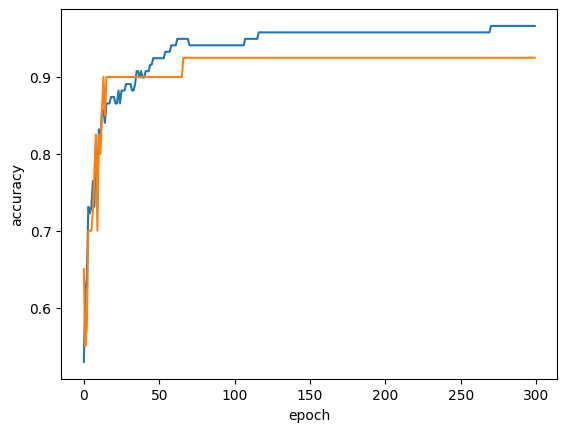

In [48]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [50]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) #반복회수 100으로 수정
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [51]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) #힌지 손실함수 적용
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [52]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [53]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [55]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [56]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [57]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [58]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


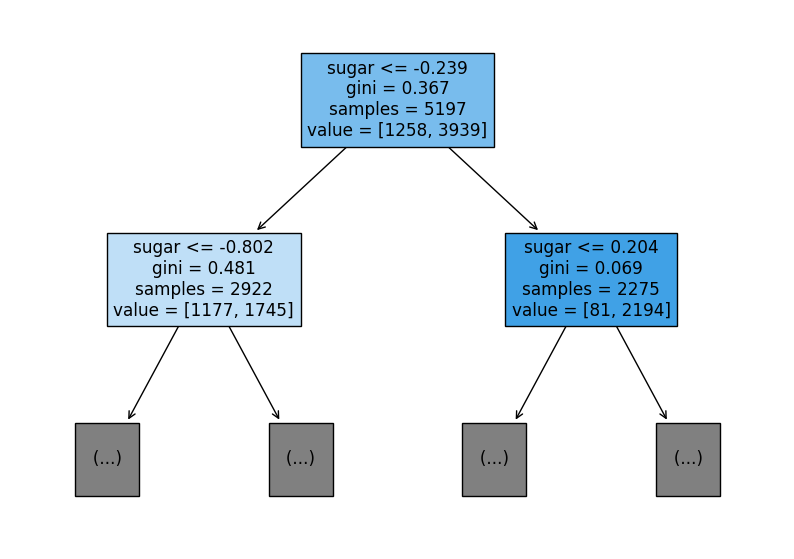

In [61]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [62]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


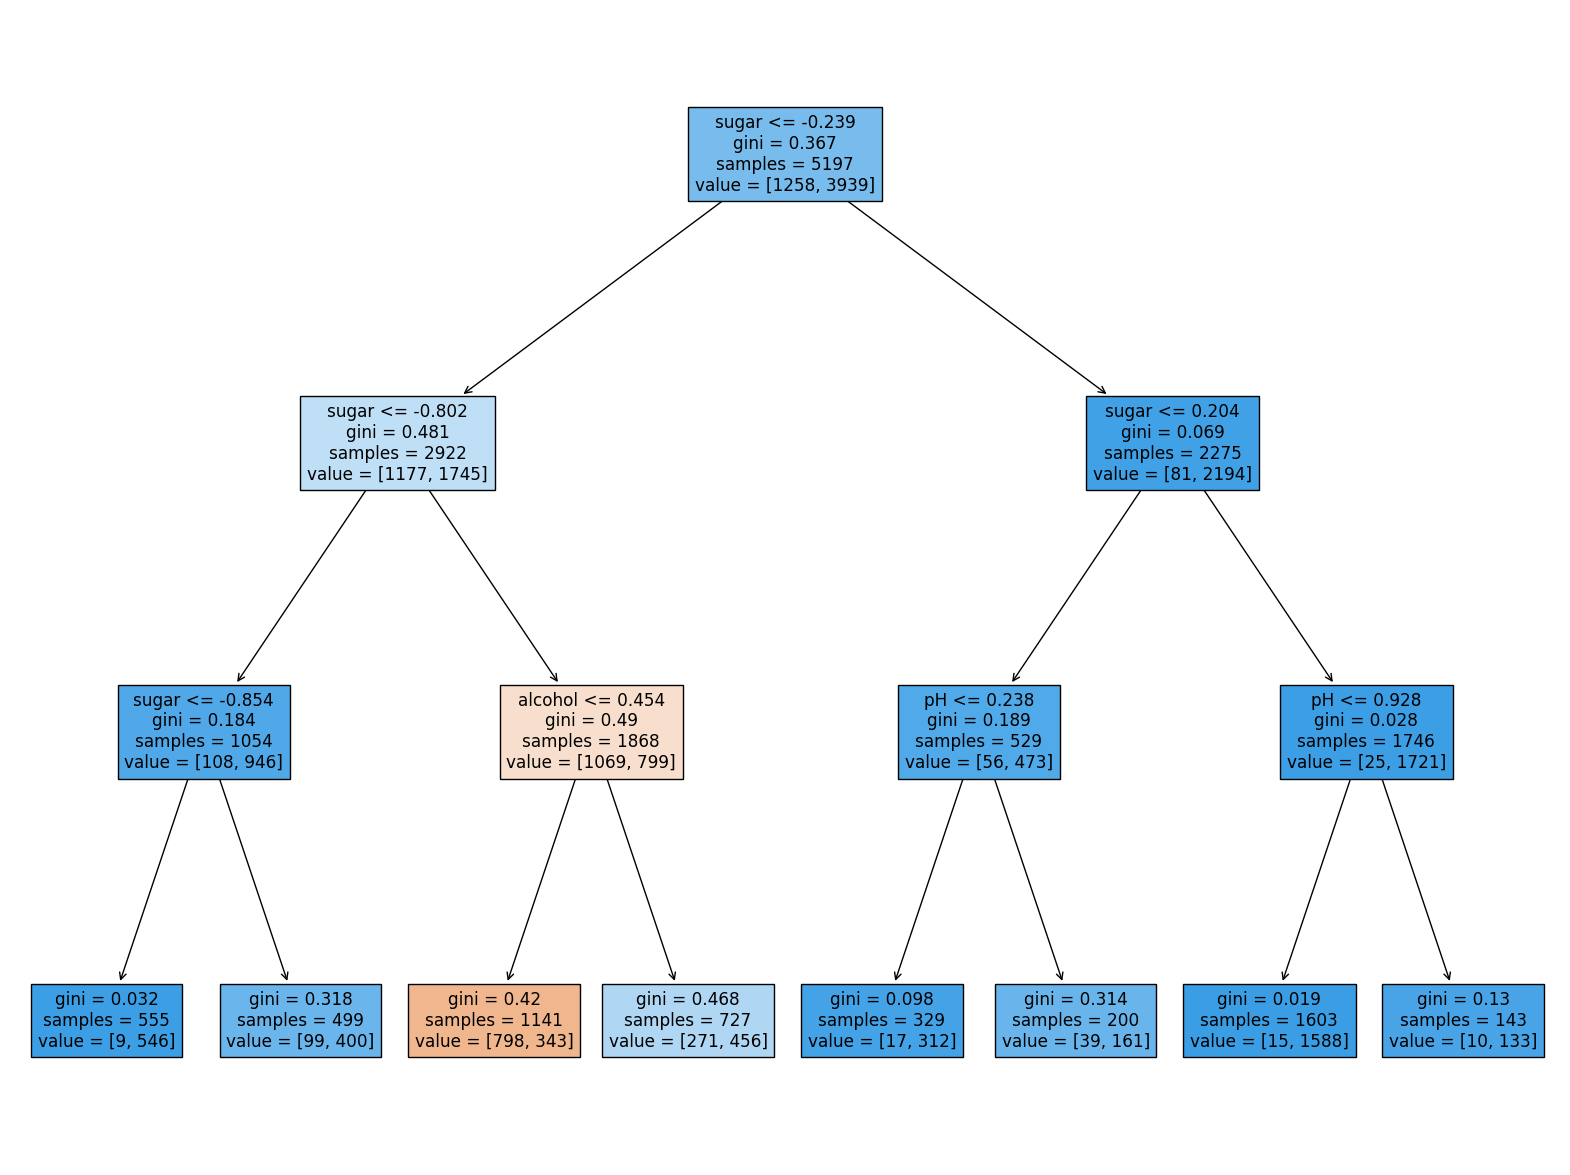

In [63]:
plt.figure(figsize=(20,15))

plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])

plt.show()

In [64]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [65]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [66]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [67]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [68]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [69]:
from sklearn.model_selection import cross_validate #교차검증 진행

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00801229, 0.00937629, 0.00700855, 0.00599623, 0.00938153]), 'score_time': array([0.00098848, 0.00100088, 0.00200796, 0.        , 0.00148654]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [70]:
print(np.mean(scores['test_score']))

0.855300214703487


In [71]:
from sklearn.model_selection import StratifiedKFold # KFold 분할기를 사용하고 분류 모델일 경우 타깃 클래스를 골고루 나누기 위해 StratifiedKFold를 사용

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [72]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [73]:
from sklearn.model_selection import GridSearchCV #하이퍼파라미터 튜닝

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [74]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)


In [75]:
gs.fit(train_input, train_target)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(20, 51),
          'min_samples_split': range(2,26),
          'min_samples_leaf': range(1,26),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 51),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_leaf': range(1, 26),
                                        'min_samples_split': range(2, 26)},
                   random_state=42)

In [ ]:
print(rs.best_params_)

{'min_samples_split': 18, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0004, 'max_depth': 39}


In [ ]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8685792552010069


In [ ]:
dt = rs.best_estimator_

print(dt.score(test_input, test_target))

0.8592307692307692


In [76]:

from scipy.stats import uniform, randint
ugen = uniform(0, 1) # 실숫값의 균등 분포 객체
ugen.rvs(10)

array([0.48672349, 0.05116236, 0.91529165, 0.71324919, 0.88910269,
       0.61329966, 0.45293364, 0.48287516, 0.03950413, 0.59903069])

In [77]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001), 
          'max_depth': randint(30, 50), 
          'min_samples_split': randint(10, 35), 
          'min_samples_leaf': randint(1, 25)}

In [78]:
from sklearn.model_selection import RandomizedSearchCV
rs  = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                         params, n_iter=100, n_jobs=1)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002949F503C88>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002949F503B88>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002949F5150C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002949F503F48>})

In [79]:
print(rs.best_params_)
rs.cv_results_['params']

{'max_depth': 41, 'min_impurity_decrease': 0.0004074175485187024, 'min_samples_leaf': 6, 'min_samples_split': 15}


[{'max_depth': 49,
  'min_impurity_decrease': 0.0005333085938787796,
  'min_samples_leaf': 8,
  'min_samples_split': 11},
 {'max_depth': 32,
  'min_impurity_decrease': 0.00013056941585113372,
  'min_samples_leaf': 12,
  'min_samples_split': 10},
 {'max_depth': 45,
  'min_impurity_decrease': 0.000745868629120368,
  'min_samples_leaf': 2,
  'min_samples_split': 26},
 {'max_depth': 33,
  'min_impurity_decrease': 0.0010930563811030252,
  'min_samples_leaf': 11,
  'min_samples_split': 34},
 {'max_depth': 40,
  'min_impurity_decrease': 0.00033794913516738595,
  'min_samples_leaf': 3,
  'min_samples_split': 34},
 {'max_depth': 47,
  'min_impurity_decrease': 0.00045527707097058523,
  'min_samples_leaf': 17,
  'min_samples_split': 34},
 {'max_depth': 44,
  'min_impurity_decrease': 0.0006522571705856131,
  'min_samples_leaf': 21,
  'min_samples_split': 14},
 {'max_depth': 37,
  'min_impurity_decrease': 0.00035267374470661605,
  'min_samples_leaf': 2,
  'min_samples_split': 17},
 {'max_depth': 35